In [1]:
import pandas as pd

base = pd.read_csv('plano-saude.csv')
base.head()

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488


In [2]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


In [3]:
# kernel linear
from sklearn.svm import SVR
regressor_linear = SVR(kernel = 'linear')
regressor_linear.fit(X, y)

/home/johnny/anaconda3/envs/regressao_svm/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor_linear.predict(X), color = 'red')
score = regressor_linear.score(X, y)
print(score)

0.7580465950334248


In [5]:
# kernel poly
regressor_poly = SVR(kernel = 'poly', degree = 3)
regressor_poly.fit(X, y)

/home/johnny/anaconda3/envs/regressao_svm/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/johnny/anaconda3/envs/regressao_svm/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

0.9710205338816734


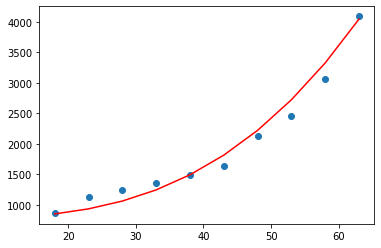

In [6]:
plt.scatter(X, y)
plt.plot(X, regressor_poly.predict(X), color = 'red')
score = regressor_poly.score(X, y)
print(score)

In [7]:
# kernel rbf
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [8]:
regressor_rbf = SVR(kernel = 'rbf')
regressor_rbf.fit(X, y)

/home/johnny/anaconda3/envs/regressao_svm/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

0.8930263523339649


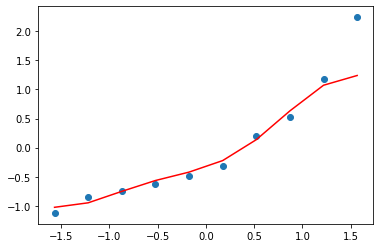

In [9]:
plt.scatter(X, y)
plt.plot(X, regressor_rbf.predict(X), color = 'red')
score = regressor_rbf.score(X, y)
print(score)

In [10]:
previsao1 = scaler_y.inverse_transform(regressor_linear.predict(scaler_x.transform(40)))
previsao2 = scaler_y.inverse_transform(regressor_poly.predict(scaler_x.transform(40)))
previsao3 = scaler_y.inverse_transform(regressor_rbf.predict(scaler_x.transform(40)))

print(previsao1)
print(previsao2)
print(previsao3)

ValueError: Expected 2D array, got scalar array instead:
array=40.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.